# Handcrafted Linear Regression Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

data = pd.read_csv("data.csv")
data = data.dropna(subset=['Schooling', 'Life expectancy '])

In [2]:
lines, columns = data.shape

print("Lines:", lines)
print("Columns:", columns)

Lines: 2768
Columns: 22


In [17]:
X = data[['Schooling']].values 
y = data['Life expectancy '].values.reshape(-1, 1)

y.shape

print(type(data['Schooling'].values))

<class 'numpy.ndarray'>


Bias

In [4]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]

X_b.shape

(2768, 2)

In [5]:
def MSE_cost(X, y, theta):
    # número de exemplos no conjuto de dados
    m = len(y)

    # Cost function for linear regression: mean squared error between predictions and actual values
    # X.dot(theta) is the dot product of the vector theta - which is a vector (n+1), 1 - in this case (2, 1)
    # Squaring the difference amplifies the model's sensitivity, addressing large errors effectively


    cost = (1/(2*m)) * np.sum(np.square(X.dot(theta) - y))

    return cost

In [6]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    
    # m is the number of training examples in the dataset
    m = len(y)

    cost_history = np.zeros(iterations)

    # Loop to perform the specified number of iterations
    for i in range(iterations):
        
        # Compute the gradients
        gradients = 1/m * X.T.dot(X.dot(theta) - y)

        # Update the theta parameters
        theta = theta - learning_rate * gradients

        if i % 100 == 0:  # Exibe a cada 10 iterações
            print(f"Iteration {i}: Cost = {MSE_cost(X, y, theta)}, Gradients = {gradients}")
    
    cost_history[i] = MSE_cost(X, y, theta)

        # Compute the cost with the updated theta and store it in the cost history
    cost_history[i] = MSE_cost(X, y, theta)
    
    # Return the optimized theta parameters and the cost history
    return theta, cost_history

In [7]:
# randomize everything

theta = np.random.randn(2,1) #(y = b + a*x), randomizing b and a

learning_rate = 0.001

iterations = 40000

In [8]:
theta_opt, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

Iteration 0: Cost = 1828.7773119636759, Gradients = [[ -70.51197398]
 [-871.21338144]]
Iteration 100: Cost = 85.3150123508567, Gradients = [[-3.07424757]
 [ 0.23778656]]
Iteration 200: Cost = 84.37114524740728, Gradients = [[-3.05227802]
 [ 0.23612425]]
Iteration 300: Cost = 83.44071855393996, Gradients = [[-3.0304683 ]
 [ 0.23443705]]
Iteration 400: Cost = 82.52354088268136, Gradients = [[-3.00881442]
 [ 0.23276191]]
Iteration 500: Cost = 81.61942357117071, Gradients = [[-2.98731526]
 [ 0.23109873]]
Iteration 600: Cost = 80.7281806434493, Gradients = [[-2.96596972]
 [ 0.22944744]]
Iteration 700: Cost = 79.84962877180529, Gradients = [[-2.9447767 ]
 [ 0.22780795]]
Iteration 800: Cost = 78.98358723906345, Gradients = [[-2.92373512]
 [ 0.22618017]]
Iteration 900: Cost = 78.12987790141177, Gradients = [[-2.90284389]
 [ 0.22456403]]
Iteration 1000: Cost = 77.28832515175753, Gradients = [[-2.88210193]
 [ 0.22295943]]
Iteration 1100: Cost = 76.4587558836051, Gradients = [[-2.86150818]
 [ 0.2

In [9]:
print("Modelo de Machine Lea}rning - Parâmetros Finais:\n", theta_opt)

Modelo de Machine Lea}rning - Parâmetros Finais:
 [[41.65673146]
 [ 2.29315204]]


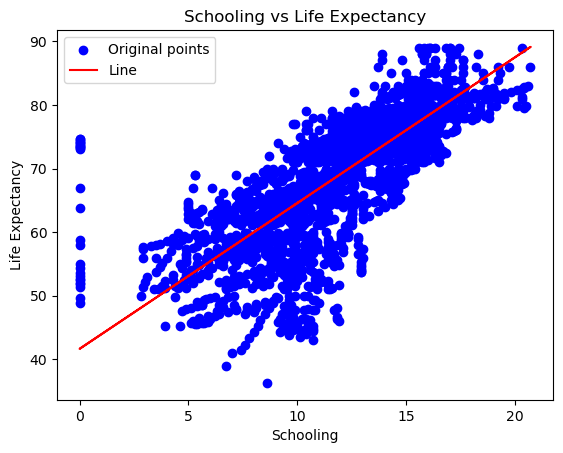

In [24]:
# Previsão com os parâmetros ajustados
y_predict = X_b.dot(theta_opt)

# Plotar os dados
plt.scatter(X, y, color='blue', label='Original points')

# Plotar a linha de regressão
plt.plot(X, y_predict, color='red', label='Line')

# Configurações do gráfico
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

# Scikit-learn

In [31]:
print("Formato de X:", X.shape)  #i was getting an error because X was 1D vector not an 2D.
print("Formato de y:", y.shape)  

Formato de X: (2768, 1)
Formato de y: (2768, 1)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

print("Bias/Intercepto: ", model.intercept_)
print("Angular coef.: ", model.coef_[0])

y_pred = model.predict(X)

Bias/Intercepto:  [44.10888913]
Angular coef.:  [2.1034531]


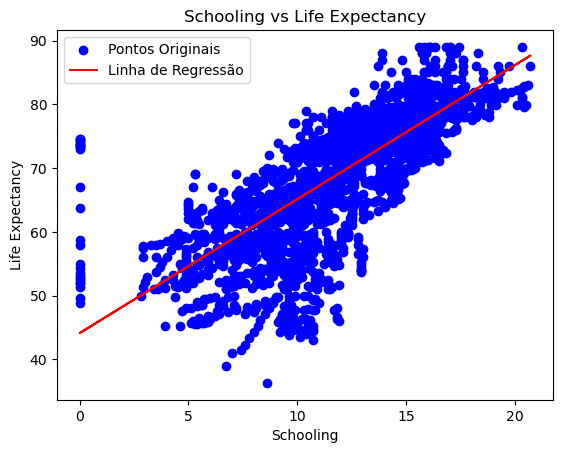

In [30]:

plt.scatter(X, y, color='blue', label='Pontos Originais')
plt.plot(X, y_pred, color='red', label='Linha de Regressão')
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error


y_pred_sklearn = model.predict(X)  
y_pred_manual = X_b.dot(theta_opt) 


mse_sklearn = mean_squared_error(y, y_pred)
mse_manual = mean_squared_error(y, y_predict)


print("Scikit-learn Model:")
print(f"Angular coefficient (a): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")
print(f"MSE: {mse_sklearn}\n")

print("Manual Model:")
print(f"Angular coefficient (a): {theta_opt[1][0]}")
print(f"Intercept (b): {theta_opt[0][0]}")
print(f"MSE: {mse_manual}\n")

Scikit-learn Model:
Angular coefficient (a): [2.1034531]
Intercept (b): [44.10888913]
MSE: 38.061879777463936

Manual Model:
Angular coefficient (a): 2.293152041985177
Intercept (b): 41.65673145830749
MSE: 38.495645095787495



# Lessons on Linear Regression

Linear regression is a model that establishes intrinsic relationships between variables in a linear manner, meaning the relationship can be represented as a straight line. The general form of the model is not just \( y = \theta x + b \), but rather:

$$
y = X\theta
$$

where:

- \( y \): The target variable (dependent variable).
- \( X \): Matrix of features (independent variables).
- \( \theta \): Vector of coefficients or weights.
- \( b \): Bias term (can be included as part of \( \theta \) if an intercept column of ones is added to \( X \)).

This formulation is powerful as it:

- Helps identify relationships between features and the target variable.
- Can reveal that the relationship might not actually be linear, prompting the use of more complex models.

## Dimensions of the Matrices

An essential rule in linear regression is to always check the dimensions of the vectors and matrices:

- \( y \): Target variable (m samples, 1 column) → Shape: \( (m, 1) \)
- \( X \): Feature matrix (m samples, n features) → Shape: \( (m, n) \)
- \( \theta \): Coefficient vector (n features, 1 column) → Shape: \( (n, 1) \)
- \( \epsilon \): Error term (m samples, 1 column) → Shape: \( (m, 1) \)

The model can be expressed as:

$$
y = \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n + b + \epsilon
$$

where \( \epsilon \) represents the residual errors (differences between predicted and actual values).

## Gradient Descent: The Optimization Method

The most crucial aspect of linear regression is the optimization method used to find the best \( \theta \). Gradient descent minimizes the cost function \( J(\theta) \), which is typically the Mean Squared Error (MSE):

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2
$$

Where \( h_\theta(x_i) \) is the prediction:

$$
h_\theta(x_i) = X_i \cdot \theta
$$

The gradient descent updates \( \theta \) iteratively:

$$
\theta := \theta - \alpha \nabla J(\theta)
$$

where:

- \( \alpha \): Learning rate.
- \( \nabla J(\theta) \): Gradient of the cost function with respect to \( \theta \).
